### Investigación en Inteligencia Artificial
#### Tarea Tema 1
#### Raúl Reguillo Carmona

En este cuaderno se van a llevar a cabo los ejercicios propuestos para el tema 1 de la asignatura Investigación en Inteligencia Artificial. Todos los puntos se han realizado con python 3. 

In [1]:
import sys
print(sys.version)

3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]


# 1. Least Common Multiple

Se han desarrollado dos implementaciones para los puntos 1) y 2). Para el primero, el desarrollo se basará en la función ```primeFactors``` que descompondrá el número que reciba en factores primos, devolviendo una lista de dichos números. Se apoyará también en la función ```countItems``` para contar ocurrencias de factores primos (esto es, el exponente de cierto número primo) a la hora de calcular ```mcd``` y ```mcm```. Éstos se calcularán mediante el producto de factores comunes con menor exponente, para el caso del mcd, y el producto de factores comunes y no comunes de mayor exponente, en caso de mcm. 

Finalmente, se implementan también utilizando el algoritmo de Euclides, mucho más inmediato. 


### Prime Factors method

In [2]:
def countItems(item, itemList):
    """
    Auxiliar function to calculate how many times some item appears in some list
    
    :param item: Item to count inside list 
    :param itemList: List provided to find how many times Item appears in
    :return: Number of times Item appears in itemList
    """
    result = 0
    for i in itemList:
        if i == item:
            result +=1
    return result
        

In [3]:
item = 2
itemList = [1,2,2,3,4]
print("Number of times %d appears in %s: %d" % (item, itemList,
                                                countItems(item, itemList)))
item = 7
print("Number of times %d appears in %s: %d" % (item, itemList,
                                                countItems(item, itemList)))

Number of times 2 appears in [1, 2, 2, 3, 4]: 2
Number of times 7 appears in [1, 2, 2, 3, 4]: 0


In [4]:
def primeFactors(a):
    """
    Decompose a number in prime factors. Recursive.

    :param a: Number to be decomposed in prime factors
    :return: list of prime factors (e.g: a=12, result is [2, 2, 3, 1] = 2²*3 = 12)
    """
    #Check number greater than 0
    assert a > 0, "Number should be greater than 0"
    result = []
    factor = -1
    #Base
    if a == 1:
        result.append(1)
    else:
        #Generate all possible candidates to divisor
        divs = list(range(2, a+1))
        i = 0
        #Iterate until we find the first integer divisor
        while a%divs[i] != 0:
            i+=1
        #First divisor is our factor
        factor = divs[i]
        #Store result and call recursively for the division of number and factor
        result.append(factor)
        result += primeFactors(int(a/factor))
    return result 

In [5]:
item = 13
print("Factors of %d: %s" % (item, primeFactors(item)))
item = 25
print("Factors of %d: %s" % (item, primeFactors(item)))
item = 200
print("Factors of %d: %s" % (item, primeFactors(item)))

Factors of 13: [13, 1]
Factors of 25: [5, 5, 1]
Factors of 200: [2, 2, 2, 5, 5, 1]


In [6]:
def mcm(a,b):
    """
    Calculates Least Common Multiple (mcm) of a and b
    
    :param a: First number to calculate Least Common Multiple
    :param b: Second number to calculate Least Common Multiple
    :return: Least Common Multiple of a and b
    """    
    #Prime factors of a and b
    factors_a = primeFactors(a)
    factors_b = primeFactors(b)
    result = 1
    #Make a set of the union of the list, commons and non-commons factors
    factors = list(set(factors_a + factors_b))
    #all item in factors are multiplied
    for item in factors:
        # Using custom function to count the power of the prime number
        itemsA = countItems(item,factors_a)
        itemsB = countItems(item,factors_b)
        #Commons and uncommons with the great power
        result *= item ** (itemsA if itemsA > itemsB else itemsB)
    return result

In [7]:
#Testing
a = 56
b = 38
print("MCM of %d and %d: %d" % (a, b, mcm(a,b)))
a = 45
b = 13
print("MCM of %d and %d: %d" % (a, b, mcm(a,b)))
a = 72
b = 50
print("MCM of %d and %d: %d" % (a, b, mcm(a,b)))

MCM of 56 and 38: 1064
MCM of 45 and 13: 585
MCM of 72 and 50: 1800


# 2. Greatest Common Factor

In [8]:
def mcd(a,b):
    """
    Calculates the Greatest Common Factor (mcd) of a and b
    
    :param a: First number to calculate Greatest Common Factor
    :param b: Second number to calculate Greatest Common Factor
    :return: Greatest Common Factor of a, b
    """    
    #Prime factors of a and b
    factors_a = primeFactors(a)
    factors_b = primeFactors(b)
    result = 1
    #Commons factor are the intersections of the sets from both lists
    commons = list(set(factors_a).intersection(set(factors_b)))
    for item in commons:
        #Use here list.count(item) instead
        itemsA = factors_a.count(item)
        itemsB = factors_b.count(item)
        #Exponent is the lower of the commons
        result *= item ** (itemsA if itemsA < itemsB else itemsB)
    return result

In [9]:
#Testing
a = 48
b = 60
print("MCM of %d and %d: %d" % (a, b, mcd(a,b)))
a = 45
b = 13
print("MCM of %d and %d: %d" % (a, b, mcd(a,b)))
a = 72
b = 50
print("MCM of %d and %d: %d" % (a, b, mcd(a,b)))

MCM of 48 and 60: 12
MCM of 45 and 13: 1
MCM of 72 and 50: 2


In [10]:
mcd(42, 56)

14

In [11]:
mcm(42, 56)

168

## Alternative to 1. and 2. using Euclidean method

In [12]:
def mcd(a, b):
    """
    Calculates the Greatest Common Factor (mcd) of a and b
    usign the Euclidean algorithm.
    
    :param a: First number to calculate Greatest Common Factor
    :param b: Second number to calculate Greatest Common Factor
    :return: Greatest Common Factor of a, b
    """       
    result = -1
    assert a > 0, "Numbers should be greater than 0"
    assert b > 0, "Numbers should be greater than 0"
    #First sort the arguments
    if b > a:
        a,b = b,a
    #Base 
    if b == 1:
        result = b
    else:
        #Pick the rest of the division
        m = a % b
        #then repeat for the minimun number and the rest of division until we reach 1
        result = b if m == 0 else mcd(b, m)
    return int(result)

def mcm(a,b):
    #Definition of mcm using mcd
    return int(a * b / mcd(a,b))

In [13]:
mcd(56, 42)

14

In [14]:
mcm(56, 42)

168

In [15]:
a = 56
b = 38
print("MCM of %d and %d: %d" % (a, b, mcm(a,b)))
a = 45
b = 13
print("MCM of %d and %d: %d" % (a, b, mcm(a,b)))
a = 72
b = 50
print("MCM of %d and %d: %d" % (a, b, mcm(a,b)))

MCM of 56 and 38: 1064
MCM of 45 and 13: 585
MCM of 72 and 50: 1800


# 3. Pie Chart Matplotlib

In [16]:
import matplotlib.pyplot as plt

In [17]:
#Dummy function for random color
import random
r = lambda: random.randint(0,255)
getRandomColor = lambda: '#%02X%02X%02X' % (r(),r(),r())

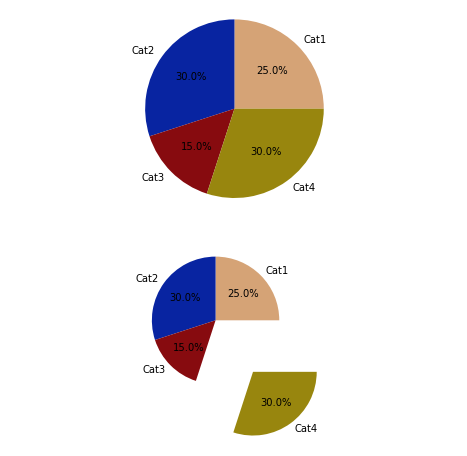

In [18]:
#Generate labels and data
labels = ['Cat1', 'Cat2', 'Cat3', 'Cat4']
data = [25, 30, 15, 30]
#Generate list of random colors for representation
colors = [getRandomColor() for x in range(4)]
fig1, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
#Piechart with data, labels, percentage of the pie and color
ax1.pie(data, labels=labels, autopct='%.1f%%', colors=colors)
ax1.axis('equal')  

#Try remarking some set?
explode = [0.0, 0.0, 0.0, 1.0]
ax2.pie(data, labels=labels, autopct='%.1f%%', explode=explode, colors=colors)
ax2.axis('equal')

plt.show()

# 4. Scatterplot

In [19]:
import numpy as np

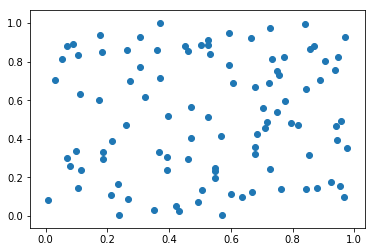

In [20]:
#Generate two random vectors of numbers
x = np.random.rand(100)
y = np.random.rand(100)
#Plot them as x,y values
figScatter, ax1 = plt.subplots(1,1)
ax1.scatter(x,y)

#### Utilidad de ScatterPlot

Este tipo de gráfico es especialmente útil para ser utilizado en varias técnicas. Para análisis de regresión nos mostrará qué forma tiene la señal y el ruido y a primera vista podremos comprobar la bondad de nuestra aproximación. 

Por otro lado, en técnicas de análisis no supervisadas, podremos ver cómo se agrupan las observaciones o detectar anomalías. 

# 5. Subplots

### Explicación subplots

Para elaborar subplots, utilizaremos la función homónima pasándole por parámetro cuantas filas y columnas tendrá el diagrama final. Así, estableceremos una serie de variables (generalmente notadas como ax1..n) con el número de filas, tal y como sigue. 

En el ejemplo vemos una figura compuesta por cuatro, en dos filas de dos columnas. Los gráficos están vacíos en tanto aún no se ha pintado nada en cada "hueco". 

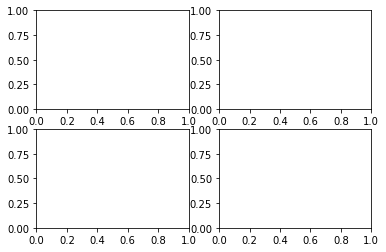

In [21]:
fig, (ax1, ax2) = plt.subplots(2,2)

Si mostramos qué pinta tiene uno de los ax, vemos que en efecto consta de dos gráficos:

In [22]:
ax2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f631b6f9048>,
      dtype=object)

A partir de este punto ya podemos pintar indicando el tipo de gráfico e indexando como lista. De esta manera podemos especificar para cada "celda" del subplot qué tipo de gráfica debe mostrar. 

In [23]:
ax1[0].scatter(x,y, color=getRandomColor())

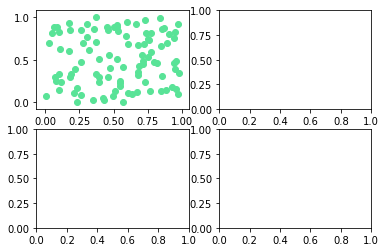

In [24]:
# show the graph until now... 
fig

Siempre a través de la variable del gráfico global (fig) podemos mostrar el resultado hasta el momento. Podemos pintar ahora el diagrama por sectores del apartado anterior en la esquina opuesta al actual.  

In [25]:
ax2[1].pie(data, labels=labels, autopct='%.1f%%', colors=colors)

([<matplotlib.patches.Wedge at 0x7f631b65a358>,
 [Text(0.777817,0.777817,'Cat1'),
  Text(-0.889919,0.646564,'Cat2'),
  Text(-0.777817,-0.777818,'Cat3'),
  Text(0.646564,-0.889919,'Cat4')],
 [Text(0.424264,0.424264,'25.0%'),
  Text(-0.48541,0.352671,'30.0%'),
  Text(-0.424264,-0.424264,'15.0%'),
  Text(0.352671,-0.48541,'30.0%')])

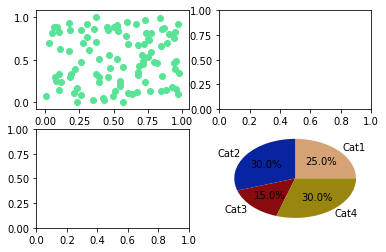

In [26]:
fig

Se puede comprobar cómo los plots son independientes al tipo de gráfico que se pinte en cada uno de ellos. A partir de este punto se generarán datos aleatorios para un par de gráficos en los huecos restantes. 

In [27]:
dat = np.sin(range(0,10))
ax1[1].plot(dat, color=getRandomColor())

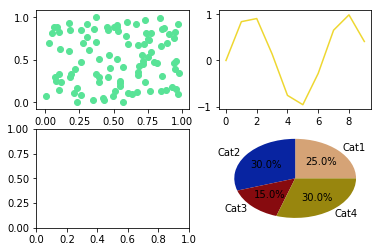

In [28]:
fig

Finalmente, un gráfico en base a una función. Cabe destacar que los gráficos se pueden superponer entre sí (útil para regresiones). 

In [29]:
#First, generate data to plot usign dummy function
f = lambda x: 2*x+1
linDat = range(0, 10)
linY = [f(x) for x in linDat ]

scatter_x = range(0,10)
scatter_y = np.random.rand(10)*10

In [30]:
#Plot in the chosen subplot
#First, plot the scatter
ax2[0].scatter(scatter_x,scatter_y, color=getRandomColor())
#Finally, plot the line
ax2[0].plot(linDat, linY, color=getRandomColor())

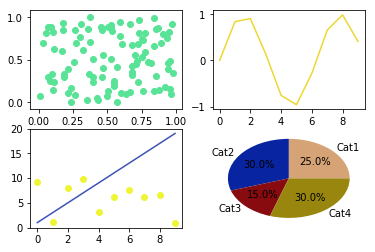

In [31]:
#Show figure
fig

Como conclusión, los subgráficos son realmente interesantes para agrupar visualizaciones que tengan relación entre sí. Su sencillez y utilidad los designan como una herramienta **imprescindible** a la hora de trabajar en ámbitos de Inteligencia Artificial. 